# Comparacion de técnicas

Este cuaderno esta diseñado exclusivamente para comparar los modelos seleccionados de cada técnica.

Para esto, hemos diseñado el siguiente plan de trabajo:

1. Cargar datos
2. Hacer modificaciones sobre los dataframes para extraer sólo los modelos relevantes
3. Mostrar resumenes
4. Gráficas.

In [1]:
#Importar elementos necesarios de las librerías
import os, shutil, re, pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#ruta de los resumenes de referencia
ruta_referencias = "D:/Documents/Documentos Universidad/Noveno/Proyecto de grado/referencias"

## Fase 1. Cargar datos

In [3]:
#Cargar el dataframe del ROUGE 1 del analisis semantico latente
filename = 'df_rouge1_LSA.pkl'
df_rouge1_LSA = pickle.load(open(filename, 'rb'))

#Cargar el dataframe del ROUGE L del analisis semantico latente
filename = 'df_rougel_LSA.pkl'
df_rougel_LSA = pickle.load(open(filename, 'rb'))

#Cargar el dataframe del ROUGE 1 de la prueba de verosimilitud logaritmica
filename = 'df_rouge1_LLR.pkl'
df_rouge1_LLR = pickle.load(open(filename, 'rb'))

#Cargar el dataframe del ROUGE L de la prueba de verosimilitud logaritmica
filename = 'df_rougel_LLR.pkl'
df_rougel_LLR = pickle.load(open(filename, 'rb'))

#Cargar resumenes del analisis semantico latente
filename = 'resumenes_LSA.pkl'
resumenes_LSA = pickle.load(open(filename, 'rb'))

#CArgar resumenes de la prueba de verosimilitud logaritmica
filename = 'resumenes_LLR.pkl'
resumenes_LLR = pickle.load(open(filename, 'rb'))

## Fase 2. Hacer modificaciones sobre los dataframes para extraer sólo los modelos relevantes

In [4]:
df_rouge1_LSA.head(3)

,f-score 5 frases,precision 5 frases,recall 5 frases,f-score 8 frases,precision 8 frases,recall 8 frases,f-score 10 frases,precision 10 frases,recall 10 frases
0,0.465004,0.600832,0.379265,0.526962,0.549075,0.506562,0.545455,0.547619,0.543307
1,0.609428,0.527697,0.721116,0.571646,0.462963,0.747012,0.523264,0.395515,0.772908
2,0.490847,0.714004,0.373967,0.560725,0.675400,0.479339,0.564841,0.638853,0.506198


In [5]:
#ELiminar valores de los modelos que fueron descartados en la última etapa
metricas=['f-score','precision','recall']
valores_no_relevantes = [5,8]
atributos_para_eliminar = []

for metrica in metricas:
    for longitud in valores_no_relevantes:
        atributos_para_eliminar.append('{} {} frases'.format(metrica,longitud))

df_rouge1_LSA.drop(atributos_para_eliminar, axis=1, inplace=True)
df_rougel_LSA.drop(atributos_para_eliminar, axis=1, inplace=True)
df_rouge1_LLR.drop(atributos_para_eliminar, axis=1, inplace=True)
df_rougel_LLR.drop(atributos_para_eliminar, axis=1, inplace=True)

#Renombrar las columnas de los dataframes
columnas_LSA = {'f-score 10 frases': 'f-score LSA','precision 10 frases': 'precision LSA',
                'recall 10 frases': 'recall LSA'}

columnas_LLR = {'f-score 10 frases': 'f-score LLR','precision 10 frases': 'precision LLR',
                'recall 10 frases': 'recall LLR'}

df_rouge1_LSA.rename(columns = columnas_LSA, inplace = True)
df_rougel_LSA.rename(columns = columnas_LSA, inplace = True)
df_rouge1_LLR.rename(columns = columnas_LLR, inplace = True)
df_rougel_LLR.rename(columns = columnas_LLR, inplace = True)

#Unir dataframes
df_rouge1 = df_rouge1_LSA.join(df_rouge1_LLR)
df_rougel = df_rougel_LSA.join(df_rougel_LLR)

In [6]:
df_rouge1.head(5)

,f-score LSA,precision LSA,recall LSA,f-score LLR,precision LLR,recall LLR
0,0.545455,0.547619,0.543307,0.509395,0.422877,0.640420
1,0.523264,0.395515,0.772908,0.459930,0.324590,0.788845
2,0.564841,0.638853,0.506198,0.611029,0.474315,0.858471
3,0.455674,0.681698,0.342210,0.701639,0.691214,0.712383
4,0.494585,0.709845,0.379501,0.565181,0.719486,0.465374


In [7]:
df_rougel.head(5)

,f-score LSA,precision LSA,recall LSA,f-score LLR,precision LLR,recall LLR
0,0.287648,0.309091,0.268987,0.399433,0.361538,0.446203
1,0.446735,0.373563,0.555556,0.431818,0.348168,0.568376
2,0.459016,0.531646,0.403846,0.608234,0.519274,0.733974
3,0.302483,0.416149,0.237589,0.524954,0.548263,0.503546
4,0.380090,0.512195,0.302158,0.419753,0.490385,0.366906


## Fase 3. Mostrar resumenes

In [9]:
textos_referencias = os.listdir(ruta_referencias)
n_referencias = len(textos_referencias)
indice_resumenes_10_frases = 2

In [10]:
for i in range(n_referencias):
    print(textos_referencias[i])
    print('LSA')
    print(resumenes_LSA[i][indice_resumenes_10_frases],'\n')
    print('LLR')
    print(resumenes_LLR[i][indice_resumenes_10_frases],'\n')

adobe-condiciones.txt
LSA
Si usted es un Usuario empresarial , acepta que , debido a la recepción de Derechos de dicha Compañía , ( 1 ) Adobe puede proporcionar a dicha Compañía la capacidad de usar , eliminar , retener y controlar su Perfil empresarial y todo su Contenido , o acceder a ellos , ya sean cargados o importados antes o luego de la fecha en que estas Condiciones se actualizaron por última vez ; ( 2 ) su uso de los Servicios y el Software se rige por el acuerdo de dicha Compañía con Adobe ; y ( 3 ) Adobe puede proporcionar su información personal a dicha Compañía. Ninguna de las partes será responsable ante la otra por cualquier retraso o incumplimiento de cualquier obligación ( excepto en el caso de sus obligaciones de pago con Adobe ) especificada en las Condiciones si el retraso o el incumplimiento se debe a eventos imprevistos que ocurran luego de la entrada en vigor de las Condiciones y que estén fuera del control razonable de las partes , como huelgas , bloqueo , guerr

## Fase 4. Graficas

In [ ]:
metricas=['f-score','precision','recall']

### Comparación ROUGE-1

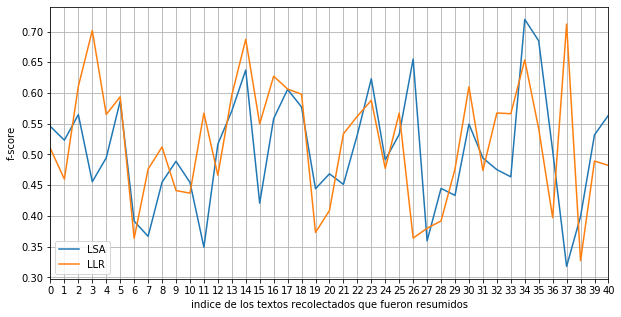

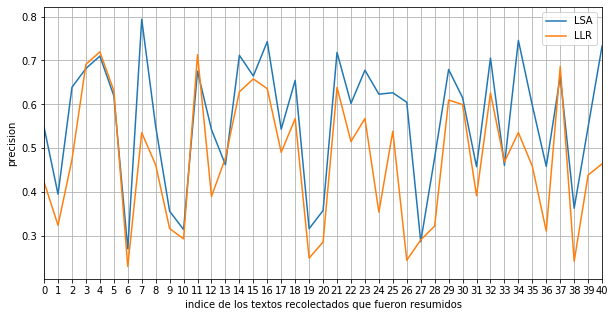

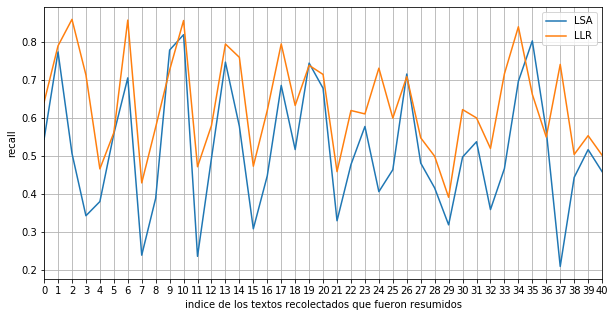

In [11]:
leyenda=['LSA','LLR']
for metrica in metricas:
    grafica = df_rouge1.plot(y=['{} LSA'.format(metrica),'{} LLR'.format(metrica)],
                             figsize=(10,5),grid=1,layout=(1,3),xticks=np.arange(0,n_referencias,1))
    grafica.set_xlabel('indice de los textos recolectados que fueron resumidos')
    grafica.set_ylabel(metrica)
    grafica.legend(leyenda)

In [13]:
df_rouge1.describe()

,f-score LSA,precision LSA,recall LSA,f-score LLR,precision LLR,recall LLR
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.505062,0.565828,0.516726,0.519892,0.475804,0.634153
std,0.091273,0.143914,0.164998,0.098537,0.148233,0.128741
min,0.317881,0.271104,0.208955,0.327273,0.230813,0.390710
25%,0.451356,0.461111,0.405479,0.459930,0.324590,0.546961
50%,0.494585,0.604651,0.496599,0.533514,0.474315,0.619165
75%,0.563847,0.677670,0.677273,0.593750,0.609808,0.730137
max,0.719831,0.793532,0.818182,0.712148,0.719486,0.858471


### Comparación ROUGE-L

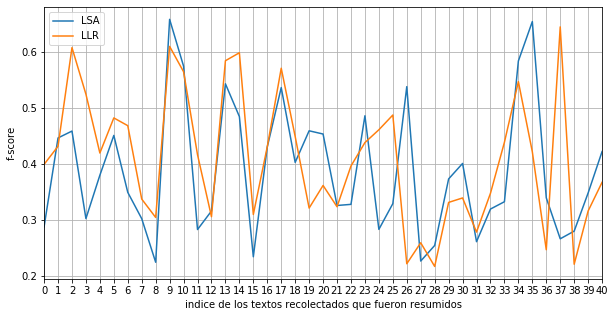

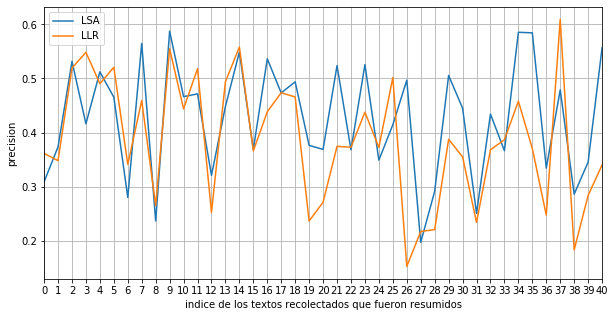

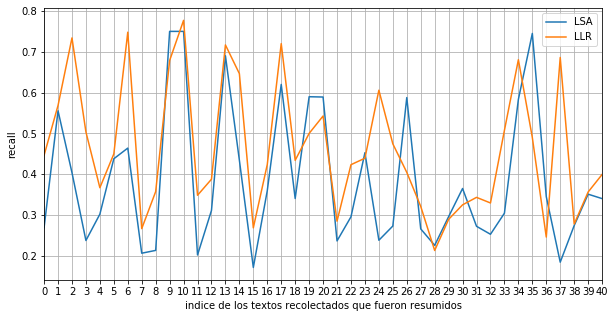

In [12]:
leyenda=['LSA','LLR']
for metrica in metricas:
    grafica = df_rougel.plot(y=['{} LSA'.format(metrica),'{} LLR'.format(metrica)],
                             figsize=(10,5),grid=1,layout=(1,3),xticks=np.arange(0,n_referencias,1))
    grafica.set_xlabel('indice de los textos recolectados que fueron resumidos')
    grafica.set_ylabel(metrica)
    grafica.legend(leyenda)

In [14]:
df_rougel.describe()

,f-score LSA,precision LSA,recall LSA,f-score LLR,precision LLR,recall LLR
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.388751,0.426621,0.385080,0.410043,0.385431,0.462989
std,0.116684,0.105752,0.169584,0.118452,0.115883,0.159755
min,0.224404,0.197279,0.171558,0.216906,0.152738,0.213166
25%,0.302362,0.349138,0.266055,0.321300,0.283898,0.343284
50%,0.349398,0.445122,0.340278,0.416667,0.372990,0.434043
75%,0.459016,0.512195,0.464000,0.482540,0.473684,0.568376
max,0.658824,0.587413,0.750000,0.645358,0.609195,0.777027
